# Kaptiza Pendulum
## 1. Import modules
- Need `np`, `solve_ivp`, and `plt`
- Animation module is not necessary (compared to last pendulum assignment).
## 2. Define the equation of motion
- Originially had 5 parameters; simplified down to three (zeta, epsilon, and alpha) after applying tau, dimensionless time.

## 3. Create utilities
- `basic_plot`, `alpha_critical`, and `average_long_timscale_response`

### 4. Solve the equation of motion

In [2]:
# import modules
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Define our equation of motion for pivot-drive pendulum

The equation of motion is:
$$ \theta'' + 2 \zeta \theta' + \left(\epsilon^2 - \alpha cos\tau \right)sin\theta = 0$$

Putting this in the form needed by the solver `solve_ivp`gives,

$$ \theta'' = - 2 \zeta \theta' - \left(\epsilon^2 - \alpha cos\tau \right)sin\theta$$

Note that $f' = \frac{df}{d\tau}$ with $\tau=\omega_d t$, a dimensionless time.

In [3]:
# define equation of motion
def pivot_driven_pendulum(tau, y, epsilon, alpha, zeta):
  """
  This function defines the equation of motion for a pivot-driven pendulum.
  PARAMETERS:
  tau : float, ndarray
    dimesnionless time : tau = omega_d*t
  y : ndarray
    state variables [theta, ang_vel]
  alpha : float
    relative displacement of the pivot to the pendulum arm : alpha = y_0/l
  epsilon : float
    dimensionless frequency : epsilon = omega_0/omega_d
  zeta : float, optional
    dimensionless damping coefficient
  RETURNS:
  dy_dtau : ndarray
    time derivatives of state variables
  """
  theta, ang_vel = y # unpack state variable
  dtheta_dtau = ang_vel # define the angular velocity
  d2theta_dtau2 = -2*zeta*dtheta_dtau - (epsilon**2 - alpha*np.cos(tau))*np.sin(theta) # equation of motion
  dy_dtau = np.array([dtheta_dtau, d2theta_dtau2]) # pack variables
  return dy_dtau # return derivative

### Define utilities

1. **`basic_plot`:**
2. **`alpha_critical`:** our guess for the boundary of the inverted state. Parameters are `epsilon`, `zeta`, `coef`; returns `alpha`.
3. Our function for time averaging the long time scale response

In [4]:
# define utilities

# basic_plot
def basic_plot(t, y, xlabel=None, ylabel=None, figsize=(3,3)):
  """
  This function plots a time series of data.
  PARAMETERS:
  t : float, ndarray
    time
  y : float, ndarray
    data
  xlabel : str, optional
    x-axis label (default is None)
  ylabel : str, optional
    y-axis label (default is None)
  figsize : tuple, optional
    figure size (default is (3,3))
  """
  plt.figure(figsize=figsize)
  plt.plot(t, y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

# define alpha_critical
def alpha_critical(epsilon, zeta, coef):
  """
  This function defines the boundary of the inverted state.
  PARAMETERS:
  epsilon : float
    dimensionless frequency : epsilon = omega_0/omega_d
  zeta : float
    dimensionless damping coefficient
  coef : float
    tuning parameter to help with fit
  RETURNS:
  alpha : float
    relative displacement of the pivot to the pendulum arm : alpha = y_0/l
  """
  alpha = coef*epsilon # our (completely unjustified) guess; omits zeta --> needs updating
  return alpha


In [7]:
def average_long_timscale_response(epsilon, alpha, zeta, n_decay):
  # define span of tau
  tau_min = 0
  tau_max = n_decay/(2*zeta)
  tau_span = [tau_min, tau_max]

  # define initial state
  theta_0 = np.pi - delta_theta
  ang_vel_0 = 0
  y_0 = [theta_0, ang_vel_0]

  # solve equation of motion
  solution = solve_ivp(pivot_driven_pendulum,
                      tau_span, y_0,
                      args=(epsilon, alpha, zeta),
                      method='Radau',
                      dense_output=True)

  # calculate our measure of the long timescale response
  tau_averaging_range = np.linspace((n_decay-1)/(2*zeta), n_decay/(2*zeta), 1000)
  cos_theta_averaging = np.mean(np.cos(solution.sol(tau_averaging_range)[0]))
  print('<cos(theta)>', cos_theta_averaging)

  return cos_theta_averaging, solution

### Solve the equation of motion

<cos(theta)> 0.16886900445274797


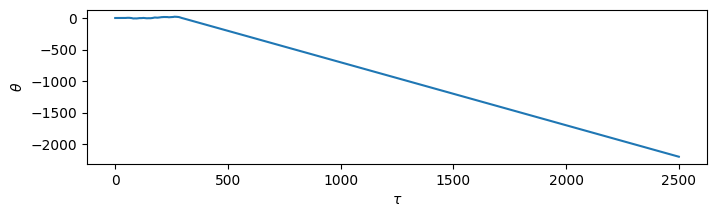

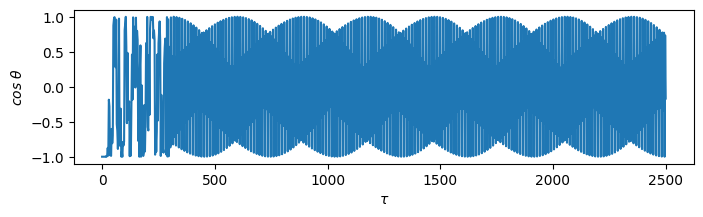

In [9]:
# input parameters
epsilon = 0.1 # dimesionless angular frequency
alpha = 0.7 # dimensionless drive strength
zeta = 0.1 # dimensionless

# number of decay times we want to integrate over
n_decay = 500

# deviation of theta from pi/inverted state
delta_theta = 0.01

cos_theta_averaging, solution = average_long_timscale_response(epsilon, alpha, zeta, n_decay)
# plot the results
# plot dynamics
# define tau/theta meshes
tau_min = 0
tau_max = n_decay/(2*zeta)
tau_plot = np.linspace(tau_min, tau_max, 1000)
theta_plot = solution.sol(tau_plot)[0]

# plot theta
plt.figure(figsize=(8,2))
plt.plot(tau_plot, theta_plot)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\theta$')
# plt.ylim(-np.pi*1.1, np.pi*1.1)
plt.show()

# plot theta
plt.figure(figsize=(8,2))
plt.plot(tau_plot, np.cos(theta_plot))
plt.xlabel(r'$\tau$')
plt.ylabel(r'$cos\ \theta$')
plt.ylim(-1.1, 1.1)
plt.show()

### Extract long time scale response on mesh of epsilon and alpha and plot with contour plot.

In [11]:
%%time

# input parameters
epsilon_list = np.linspace(0.01, 0.7, 20) # dimesionless angular frequency
alpha_list = np.linspace(0, 0.8, 20) # dimensionless drive strength
zeta = 0.1 # dimensionless damping

# number of decay times we want to integrate over
n_decay = 500

# initialize our mesh for the average long scale response
cos_theta_mesh = np.zeros((len(alpha_list), len(epsilon_list)))
# print(cos_theta_mesh)

for i, alpha in enumerate(alpha_list):
  for j, epsilon in enumerate(epsilon_list):
    cos_theta_averaging, solution = average_long_timscale_response(epsilon, alpha, zeta, n_decay=n_decay)
    cos_theta_mesh[i, j] = cos_theta_averaging

# something is making it still print the long list and idk what it is! but it's annoying sorry



<cos(theta)> -0.9993990236053002
<cos(theta)> 0.9999999999999999
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> -0.9999999999999893
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 0.999999999999999
<cos(theta)> 0.9999999999998105
<cos(theta)> 0.9999999999999866
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 0.9999999999999999
<cos(theta)> 0.9999999999999999
<cos(theta)> 0.9999999999999996
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 0.9999999999999982
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> -0.9999999999990996
<cos(theta)> -0.999999999931333
<cos(theta)> 0.9999999999999962
<cos(theta)> 1.0
<cos(theta)> 1.0
<cos(theta)> 0.9999999999998477
<cos(t

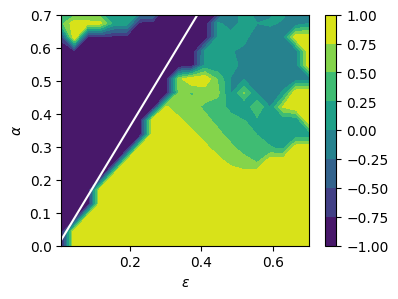

In [13]:
# plot output as a contour plot
plt.figure(figsize=(4, 3))
plt.contourf(epsilon_list, alpha_list, cos_theta_mesh)
plt.plot(epsilon_list, alpha_critical(epsilon_list, zeta, 1.8), 'w') # 1.8 is my best guess for this line; it would be better if it could be shifted up a bit
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\alpha$')
plt.ylim(0, 0.7)
plt.colorbar()
plt.show()